In [592]:
#Flight price prediction is a regression problem as the target variable is a numeric value. Lets start with the data_train excel

In [593]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
import scipy
from scipy import stats
from scipy.stats import zscore
import datetime
import warnings
warnings.filterwarnings("ignore")

In [594]:
#lets begin by importing csv file
df=pd.read_excel("Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [595]:
#lets convert the excel file into a dataframe
Flight_Price_Prediction=pd.DataFrame(data=df)
Flight_Price_Prediction

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [596]:
Flight_Price_Prediction.shape
#number of rows are 10683 and 11 columns

(10683, 11)

In [597]:
Flight_Price_Prediction.dtypes
##the dtypes is object,datetime and int

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [598]:
#lets find if there are any missing values
Flight_Price_Prediction.isnull().sum()
#Route and total stops have one missing value so lets treat the missing values first

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [599]:
#lets drop the attribute route
Flight_Price_Prediction.drop("Route",axis=1,inplace=True)

In [600]:
#lets treat the total_stops with mode
Flight_Price_Prediction["Total_Stops"]=Flight_Price_Prediction.Total_Stops.fillna(Flight_Price_Prediction["Total_Stops"].mode()[0])

In [601]:
#lets check if all missing values have been removed

Flight_Price_Prediction.isnull().sum()
#All missing values have been removed

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

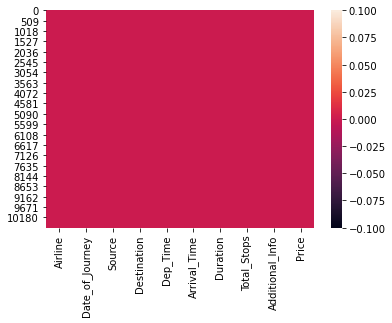

In [602]:
#lets confirm if missing values are removed using heatmap
sns.heatmap(Flight_Price_Prediction.isnull())
#all missing values have been removed

In [603]:
#lets convert the date of journey attribute to date time datatype and then extract year,month and date from it
Flight_Price_Prediction["Date_of_Journey"]=pd.to_datetime(Flight_Price_Prediction["Date_of_Journey"])
Flight_Price_Prediction["Date_of_Journey"]

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

In [604]:
Flight_Price_Prediction["year"]=Flight_Price_Prediction["Date_of_Journey"].dt.year

In [605]:
Flight_Price_Prediction["month"]=Flight_Price_Prediction["Date_of_Journey"].dt.month

In [606]:
Flight_Price_Prediction["day"]=Flight_Price_Prediction["Date_of_Journey"].dt.day

In [607]:
#lets convert Dep_Time to a datetime datatype from object and then extract hour and minute

Flight_Price_Prediction["Dep_Time"]=pd.to_datetime(Flight_Price_Prediction["Dep_Time"])

In [608]:
Flight_Price_Prediction["Dep_hour"]=Flight_Price_Prediction["Dep_Time"].dt.hour

In [609]:
Flight_Price_Prediction["Dep_minutes"]=Flight_Price_Prediction["Dep_Time"].dt.minute

In [610]:
#lets convert Arrival_Time to a datetime datatype from object and then extract hour and minute

Flight_Price_Prediction["Arrival_Time"]=pd.to_datetime(Flight_Price_Prediction["Arrival_Time"])

In [611]:
#lets convert Dep_Time to a datetime datatype from object and then extract hour and minute

Flight_Price_Prediction["Arrival_hour"]=Flight_Price_Prediction["Arrival_Time"].dt.hour

In [612]:
Flight_Price_Prediction["Arrival_minute"]=Flight_Price_Prediction["Arrival_Time"].dt.minute

In [613]:
Flight_Price_Prediction["Duration"]=Flight_Price_Prediction["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [614]:
#lets drop the rows which have been extraacted
Flight_Price_Prediction.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [615]:
Flight_Price_Prediction.head(2879)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,day,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,Jet Airways,Kolkata,Banglore,1480,1 stop,In-flight meal not included,10539,2019,9,6,20,25,21,5
2875,Jet Airways,Kolkata,Banglore,750,1 stop,No info,14676,2019,9,6,9,35,22,5
2876,Jet Airways,Delhi,Cochin,1570,1 stop,In-flight meal not included,6017,2019,3,27,2,15,4,25
2877,Jet Airways,Banglore,Delhi,185,non-stop,In-flight meal not included,4544,2019,1,4,18,55,22,0


In [616]:
#details pertaining to truejet airlines are not available in the test data and hence we shall delete them from the train data
Flight_Price_Prediction.drop([2878],axis=0,inplace=True)

#lets apply label encoder

le1=LabelEncoder()
Flight_Price_Prediction["Airline"]=le1.fit_transform(Flight_Price_Prediction["Airline"])

le2=LabelEncoder()
Flight_Price_Prediction["Source"]=le2.fit_transform(Flight_Price_Prediction["Source"])

le3=LabelEncoder()
Flight_Price_Prediction["Destination"]=le3.fit_transform(Flight_Price_Prediction["Destination"])

le4=LabelEncoder()
Flight_Price_Prediction["Total_Stops"]=le4.fit_transform(Flight_Price_Prediction["Total_Stops"])

le5=LabelEncoder()
Flight_Price_Prediction["Additional_Info"]=le5.fit_transform(Flight_Price_Prediction["Additional_Info"])

#with label encoder we do not get desired accuracy hence we shall use get dummies 


In [617]:
Airline=Flight_Price_Prediction["Airline"]
Airline=pd.get_dummies(Airline)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [618]:
Source=Flight_Price_Prediction["Source"]
Source=pd.get_dummies(Source)
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,1,0,0,0,0


In [619]:
Destination=Flight_Price_Prediction["Destination"]
Destination=pd.get_dummies(Destination)
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0,1
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [620]:
Total_Stops=Flight_Price_Prediction["Total_Stops"]
Total_Stops=pd.get_dummies(Total_Stops)
Total_Stops.head()

,1 stop,2 stops,3 stops,4 stops,non-stop
0,0,0,0,0,1
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [621]:
Additional_Info=Flight_Price_Prediction["Additional_Info"]
Additional_Info=pd.get_dummies(Additional_Info)
Additional_Info.head()

,1 Long layover,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0


In [622]:
Flight_Price_Prediction_New=pd.concat([Flight_Price_Prediction,Airline,Source,Destination,Total_Stops],axis=1)

In [623]:
Flight_Price_Prediction_New

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,year,month,day,...,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 stop,2 stops,3 stops,4 stops,non-stop
0,IndiGo,Banglore,New Delhi,170,non-stop,No info,3897,2019,3,24,...,0,0,0,0,1,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,2 stops,No info,7662,2019,1,5,...,0,0,0,0,0,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,1140,2 stops,No info,13882,2019,9,6,...,1,0,0,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,325,1 stop,No info,6218,2019,12,5,...,0,0,0,0,0,1,0,0,0,0
4,IndiGo,Banglore,New Delhi,285,1 stop,No info,13302,2019,1,3,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150,non-stop,No info,4107,2019,9,4,...,0,0,0,0,0,0,0,0,0,1
10679,Air India,Kolkata,Banglore,155,non-stop,No info,4145,2019,4,27,...,0,0,0,0,0,0,0,0,0,1
10680,Jet Airways,Banglore,Delhi,180,non-stop,No info,7229,2019,4,27,...,0,1,0,0,0,0,0,0,0,1
10681,Vistara,Banglore,New Delhi,160,non-stop,No info,12648,2019,1,3,...,0,0,0,0,1,0,0,0,0,1


In [625]:
Flight_Price_Prediction_New.drop(["Airline","Source","Destination","Total_Stops","Additional_Info"],axis=1,inplace=True)

In [626]:

#lets use univariate analysis

print(Flight_Price_Prediction.value_counts("Airline"))
#Jet airways has the most number of airlines

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
dtype: int64


Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
dtype: int64


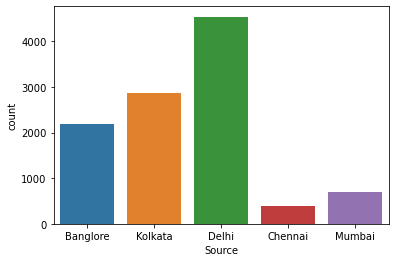

In [629]:
sns.countplot(Flight_Price_Prediction["Source"])
print(Flight_Price_Prediction.value_counts("Source"))
#Source for most flight is Delhi

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
dtype: int64


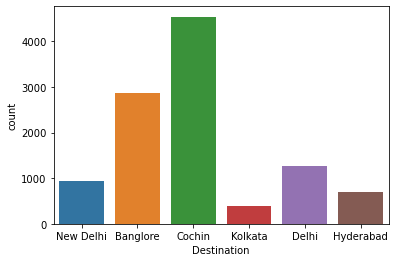

In [628]:
sns.countplot(Flight_Price_Prediction["Destination"])
print(Flight_Price_Prediction.value_counts("Destination"))
#Destination for most flight is Cochin

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
dtype: int64


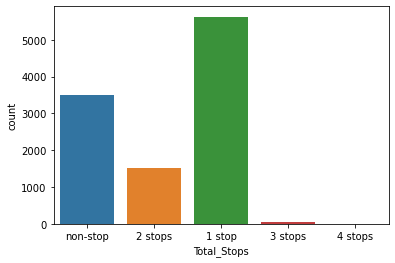

In [630]:
sns.countplot(Flight_Price_Prediction["Total_Stops"])
print(Flight_Price_Prediction.value_counts("Total_Stops"))
#Flights with 1 stop are the most in numbers

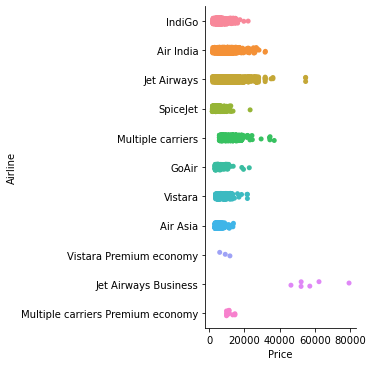

In [536]:
#lets use bivariate analysis
sns.catplot(x="Price",y="Airline",kind="strip",data=Flight_Price_Prediction)
#the price for jet airways is the most

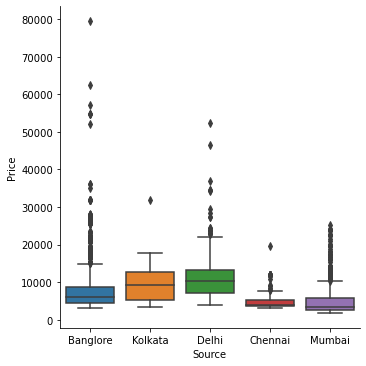

In [537]:
sns.catplot(x="Source",y="Price",kind="box",data=Flight_Price_Prediction)
#the price for flights starting from delhi is the highest amongst other source destinations

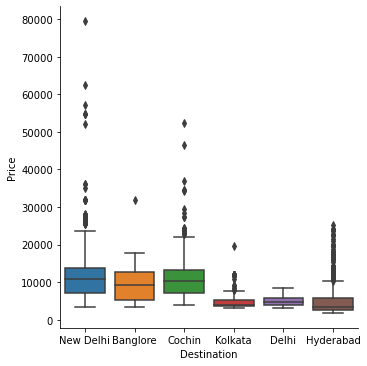

In [538]:
sns.catplot(x="Destination",y="Price",kind="box",data=Flight_Price_Prediction)
#the price for flights with destination with New Delhi is the most

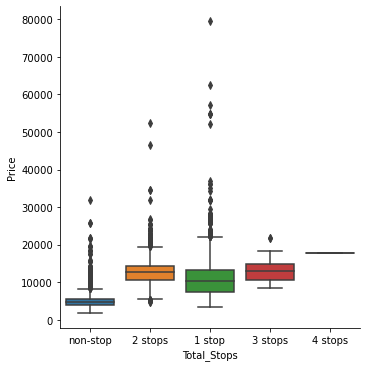

In [539]:
sns.catplot(x="Total_Stops",y="Price",kind="box",data=Flight_Price_Prediction)
#the price for flights with 3 stops the most

In [540]:
#there is no need to remove outliers as all the data is being lost if we treat the outliers

In [541]:
Flight_Price_Prediction.skew()
#there is no skewness to be treated

Duration          0.860944
Price             1.812575
year              0.000000
month             0.629556
day               0.367234
Dep_hour          0.113092
Dep_minutes       0.166859
Arrival_hour     -0.369876
Arrival_minute    0.110863
dtype: float64

In [542]:
#lets separate the x and y before performing machine learning

In [543]:
x=Flight_Price_Prediction_New.drop("Price",axis=1)
x.columns

Index(['Duration', 'year', 'month', 'day', 'Dep_hour', 'Dep_minutes',
       'Arrival_hour', 'Arrival_minute', 'Air Asia', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', '1 stop', '2 stops', '3 stops', '4 stops', 'non-stop'],
      dtype='object')

In [544]:
y=Flight_Price_Prediction_New["Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [545]:
S=StandardScaler()
x=S.fit_transform(x)
x

array([[-0.93165549,  0.        , -0.84844966, ..., -0.06504242,
        -0.00967596,  1.43522411],
       [-0.39015008,  0.        , -1.5179089 , ..., -0.06504242,
        -0.00967596, -0.6967553 ],
       [ 0.97838178,  0.        ,  1.15992807, ..., -0.06504242,
        -0.00967596, -0.6967553 ],
       ...,
       [-0.91196439,  0.        , -0.51372003, ..., -0.06504242,
        -0.00967596,  1.43522411],
       [-0.9513466 ,  0.        , -1.5179089 , ..., -0.06504242,
        -0.00967596,  1.43522411],
       [-0.281849  ,  0.        ,  1.15992807, ..., -0.06504242,
        -0.00967596, -0.6967553 ]])

In [546]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6943, 35)
(3739, 35)
(6943,)
(3739,)


In [547]:
#1) Linear Regression
lm=LinearRegression()
lm.fit(x_train,y_train)
#lets predict y values
pred1=lm.predict(x_test)
print(r2_score(y_test,pred1))
score1=cross_val_score(lm,x,y,cv=5)
print(score1)
print(score1.mean())
print(score1.std())

-1.8416907554891336e+19
[ 5.92114163e-01  6.37320307e-01  6.21269391e-01  5.99810738e-01
 -5.91738106e+25]
-1.1834762121845953e+25
2.3669524243691905e+25


In [548]:
#2) Lasso
ls=Lasso()
ls.fit(x_train,y_train)
#predict y_values
pred3=ls.predict(x_test)
print(r2_score(y_test,pred3))
score3=cross_val_score(ls,x,y,cv=5)
print(score3)
print(score3.mean())
print(score3.std())

0.5978558831349288
[0.59207432 0.63724586 0.62125683 0.59984692 0.63441417]
0.6169676193181894
0.01814817678419683


In [549]:
#3) Ridge
rd=Ridge()
rd.fit(x_train,y_train)
#predict y_values
pred4=rd.predict(x_test)
print(r2_score(y_test,pred4))
score4=cross_val_score(rd,x,y,cv=5)
print(score4)
print(score4.mean())
print(score4.std())

0.5978039537328078
[0.59206647 0.63728758 0.62126153 0.59983277 0.63429882]
0.6169494329119055
0.01814043802710436


In [550]:
#4) RandomForest
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
#predict y_values
pred5=rd.predict(x_test)
print(r2_score(y_test,pred5))
score5=cross_val_score(rf,x,y,cv=5)
print(score5)
print(score5.mean())
print(score5.std())

0.5978039537328078
[0.81345175 0.80473163 0.84407746 0.81470661 0.76228052]
0.8078495936960449
0.026370907579781496


In [633]:
#best fit model is lasso:
parameters={"alpha":[1.0,1.1,2.1,2.0],"fit_intercept":["True","False"],"normalize":[True,False],"random_state":[20,42,50,75]}
rsearch=RandomizedSearchCV(ls,parameters)
rsearch.fit(x_train,y_train)

RandomizedSearchCV(estimator=Lasso(),
                   param_distributions={'alpha': [1.0, 1.1, 2.1, 2.0],
                                        'fit_intercept': ['True', 'False'],
                                        'normalize': [True, False],
                                        'random_state': [20, 42, 50, 75]})

In [634]:
#lets find the best parameters now
print(rsearch.best_params_)
print(rsearch.best_score_)
print(rsearch.best_estimator_)

{'random_state': 75, 'normalize': False, 'fit_intercept': 'True', 'alpha': 1.0}
0.6252894035250092
Lasso(fit_intercept='True', random_state=75)


In [635]:
#lets put these parameters back into the ridge model
ls1=Lasso(random_state=75,normalize=False,fit_intercept=True,alpha=1)
ls1.fit(x_train,y_train)
#predict y_values
pred6=ls1.predict(x_test)
print(r2_score(y_test,pred6))

0.5978558831349288


In [639]:
#lets searilise and dump the file for further use
import joblib
joblib.dump(ls1,"ls1.obj")

['ls1.obj']

In [716]:
#lets load test data

In [717]:
df1=pd.read_excel("Test_set.xlsx")
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [718]:
#lets convert the csv file into a dataframe
Flight_Price_Prediction_New1=pd.DataFrame(data=df1)
Flight_Price_Prediction_New1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [719]:
Flight_Price_Prediction_New1.shape
#it has 2671 rows and 10 columns

(2671, 10)

In [720]:
#lets check for missing values if any
Flight_Price_Prediction_New1.isnull().sum()
#there are no missing values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [721]:
#lets convert Dep_Time to a datetime datatype from object and then extract year,month and day
Flight_Price_Prediction_New1["Date_of_Journey"]=pd.to_datetime(Flight_Price_Prediction_New1["Date_of_Journey"])
Flight_Price_Prediction_New1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,2019-03-27,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,2019-06-03,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,2019-06-03,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [722]:
Flight_Price_Prediction_New1["year"]=Flight_Price_Prediction_New1["Date_of_Journey"].dt.year

In [723]:
Flight_Price_Prediction_New1["month"]=Flight_Price_Prediction_New1["Date_of_Journey"].dt.month

In [724]:
Flight_Price_Prediction_New1["day"]=Flight_Price_Prediction_New1["Date_of_Journey"].dt.day

In [725]:
#lets convert Dep_Time to a datetime datatype from object and then extract hour and minute

Flight_Price_Prediction_New1["Dep_Time"]=pd.to_datetime(Flight_Price_Prediction_New1["Dep_Time"])

In [726]:
Flight_Price_Prediction_New1["Dep_hour"]=Flight_Price_Prediction_New1["Dep_Time"].dt.hour

In [727]:
Flight_Price_Prediction_New1["Dep_minute"]=Flight_Price_Prediction_New1["Dep_Time"].dt.minute

In [728]:
#lets convert Arrival_Time to a datetime datatype from object and then extract hour and minute

Flight_Price_Prediction_New1["Arrival_Time"]=pd.to_datetime(Flight_Price_Prediction_New1["Arrival_Time"])

In [729]:
Flight_Price_Prediction_New1["Arrival_hour"]=Flight_Price_Prediction_New1["Arrival_Time"].dt.hour

In [730]:
Flight_Price_Prediction_New1["Arrival_minute"]=Flight_Price_Prediction_New1["Arrival_Time"].dt.minute

In [731]:
Flight_Price_Prediction_New1["Duration"]=Flight_Price_Prediction_New1["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [732]:
#lets drop the rows which have been extraacted
Flight_Price_Prediction_New1.drop(["Date_of_Journey","Dep_Time","Arrival_Time"],axis=1,inplace=True)

In [733]:
Flight_Price_Prediction_New1.head(15)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,year,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,2019,6,24,23,55,2,45
5,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1100,1 stop,In-flight meal not included,2019,12,6,18,15,12,35
6,Air India,Banglore,New Delhi,BLR → TRV → DEL,905,1 stop,No info,2019,12,3,7,30,22,35
7,IndiGo,Kolkata,Banglore,CCU → HYD → BLR,315,1 stop,No info,2019,1,5,15,15,20,30
8,IndiGo,Kolkata,Banglore,CCU → BLR,165,non-stop,No info,2019,3,15,10,10,12,55
9,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,365,1 stop,No info,2019,5,18,16,30,22,35


In [734]:
Airline=Flight_Price_Prediction_New1["Airline"]
Airline=pd.get_dummies(Airline)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [735]:
Source=Flight_Price_Prediction_New1["Source"]
Source=pd.get_dummies(Source)
Source.head()

,Banglore,Chennai,Delhi,Kolkata,Mumbai
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [736]:
Destination=Flight_Price_Prediction_New1["Destination"]
Destination=pd.get_dummies(Destination)
Destination.head()

,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [737]:
Total_Stops=Flight_Price_Prediction_New1["Total_Stops"]
Total_Stops=pd.get_dummies(Total_Stops)
Total_Stops.head()

,1 stop,2 stops,3 stops,4 stops,non-stop
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1


In [738]:
Additional_Info=Flight_Price_Prediction_New1["Additional_Info"]
Additional_Info=pd.get_dummies(Additional_Info)
Additional_Info.head()

,1 Long layover,Business class,Change airports,In-flight meal not included,No check-in baggage included,No info
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [739]:
Flight_Price_Prediction_New1=pd.concat([Flight_Price_Prediction_New1,Airline,Source,Destination,Total_Stops],axis=1)

In [740]:
Flight_Price_Prediction_New1.drop(["Airline","Source","Destination","Total_Stops","Additional_Info"],axis=1,inplace=True)

In [741]:
Flight_Price_Prediction_New1.drop(["Route"],axis=1,inplace=True)

In [742]:
Flight_Price_Prediction_New1

,Duration,year,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Air Asia,Air India,...,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 stop,2 stops,3 stops,4 stops,non-stop
0,655,2019,6,6,17,30,4,25,0,0,...,1,0,0,0,0,1,0,0,0,0
1,240,2019,12,5,6,20,10,20,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1425,2019,5,21,19,15,19,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,780,2019,5,21,8,0,21,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,170,2019,6,24,23,55,2,45,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,2019,6,6,20,30,20,25,0,1,...,0,0,0,0,0,1,0,0,0,0
2667,155,2019,3,27,14,20,16,55,0,0,...,0,0,0,0,0,0,0,0,0,1
2668,395,2019,6,3,21,50,4,25,0,0,...,1,0,0,0,0,1,0,0,0,0
2669,915,2019,6,3,4,0,19,15,0,1,...,1,0,0,0,0,1,0,0,0,0


In [744]:
#lets predict the price of the ticket
pred7=ls1.predict(Flight_Price_Prediction_New1)
pred7

array([47988.76965942, 18076.70332004, 81543.51879533, ...,
       34112.53808919, 61483.79690386, 49268.01614228])

In [745]:
#lets searialise and dump the model

joblib.dump(ls1,"ls1.obj")

['ls1.obj']